https://dacon.io/competitions/official/235713/leaderboard

In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 2.2MB/s 


In [50]:
import sklearn

sklearn.__version__

'0.24.2'

index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류<br>
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준<br>
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부<br>
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식<br>
['Municipal apartment', 'House / apartment', 'With parents',
'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
<br>데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
<br>데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
<br>양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형
      [nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff']
- family_size: 가족 규모
- begin_month: 신용카드 발급 월 <br>
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
<br><br>
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
<br>
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [2]:
!unzip open.zip

Archive:  open.zip
   creating: open/
  inflating: open/train.csv          
  inflating: open/sample_submission.csv  
  inflating: open/test.csv           


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd

from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [31]:
train = pd.read_csv("open/train.csv")
test = pd.read_csv("open/test.csv")
submission = pd.read_csv("open/sample_submission.csv")

In [5]:
unique_len = train.apply(lambda x : len(x.unique()))

In [6]:
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               3
dtype: int64

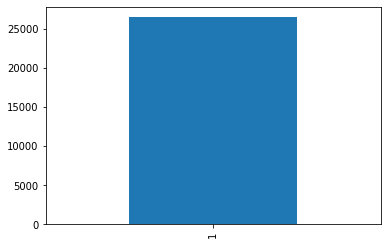

In [14]:
train["FLAG_MOBIL"].value_counts().plot.bar()

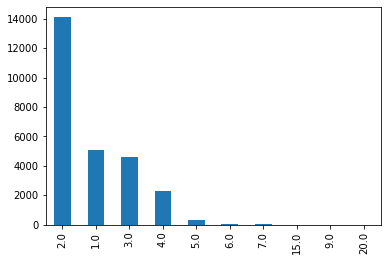

In [39]:
train["family_size"].value_counts().plot.bar()

In [41]:
train["family_size"] = train["family_size"].apply(lambda x: 5 if x > 4 else x)
test["family_size"] = test["family_size"].apply(lambda x: 5 if x > 4 else x)

In [35]:
del train["FLAG_MOBIL"]
del test["FLAG_MOBIL"]

del train["occyp_type"]
del test["occyp_type"]

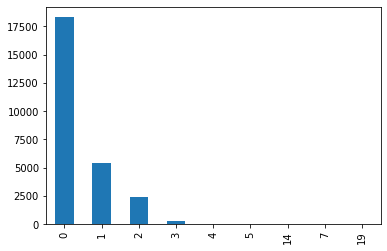

In [23]:
train["child_num"].value_counts().plot.bar()

In [32]:
train["child_num"] = train["child_num"].apply(lambda x: 1 if x > 0 else 0)
test["child_num"] = test["child_num"].apply(lambda x: 1 if x > 0 else 0)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [38]:
print(train.shape)
print(test.shape)
print(submission.shape)

(26457, 18)
(10000, 17)
(10000, 4)


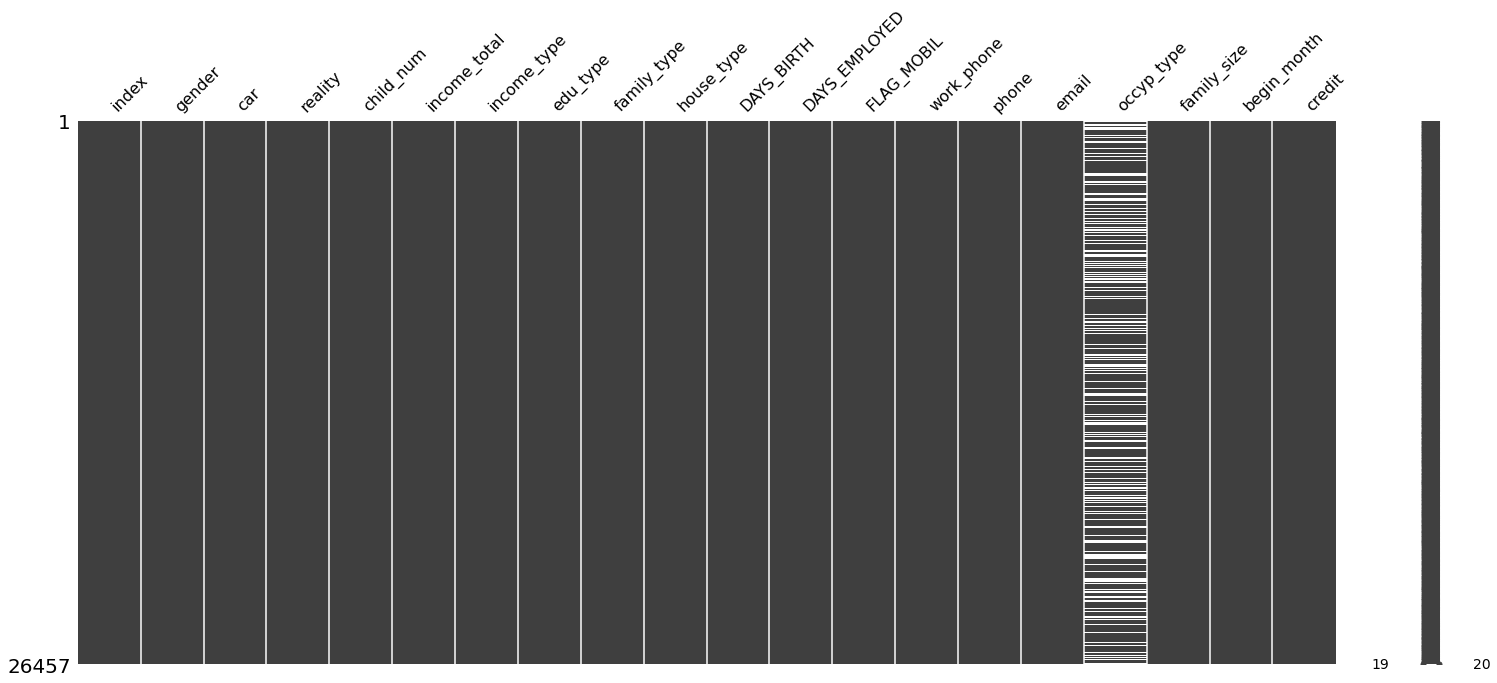

In [ ]:
import missingno as msno
msno.matrix(train)

In [34]:
#Nan을 missing으로 변경
train['occyp_type'] = train['occyp_type'].fillna('missing')
test['occyp_type'] = test['occyp_type'].fillna('missing')

In [10]:
train 

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,missing,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,missing,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


#전처리

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#label = ['gender', 'car', 'reality', 'income_type'	,'edu_type'	,'family_type'	,'house_type', 'occyp_type']
label = ['gender', 'car', 'reality', 'income_type'	,'edu_type'	,'family_type'	,'house_type']

for col in label :
  print(col)
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

gender
car
reality
income_type
edu_type
family_type
house_type


In [42]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,0,0,0,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,0,0,1,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,0,1,0,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,0,1,0,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,0,0,0,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,1,225000.0,2,4,1,1,-12079,-1984,0,0,0,4.0,-2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,-15291,-2475,0,0,0,2.0,-47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,-10082,-2015,0,0,0,2.0,-25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,-10145,-107,0,0,0,1.0,-59.0,2.0


In [13]:
print(train['income_total'].min())
print(train['income_total'].max())

27000.0
1575000.0


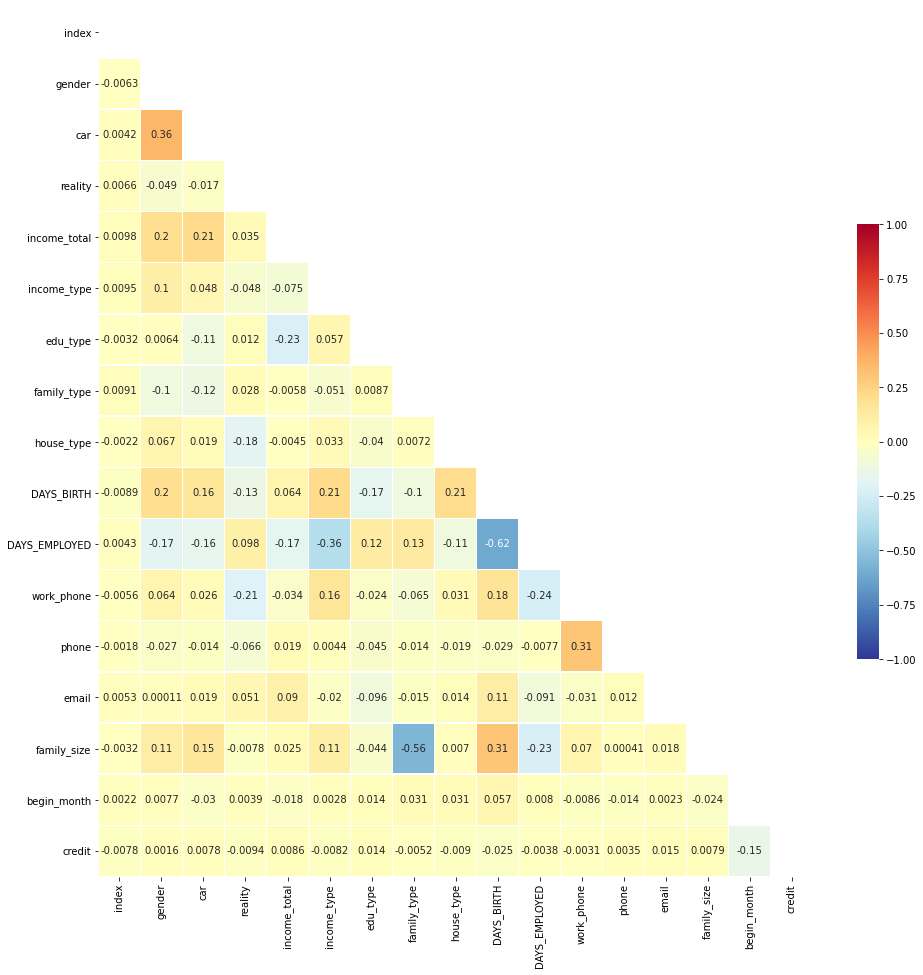

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(16,16) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


1. child_num이랑 family size 상관관계 높아서 둘 중 하나 삭제해도 괜찮지 않을까
2. work phone, phone이 과연 영향을 많이 미칠까?
3. DAYS들을 좀 더 간소화해서 표현하게 변환이 필요할 듯

In [44]:
del train["child_num"]
del test["child_num"]

In [49]:
train_y

0        1.0
1        1.0
2        2.0
3        0.0
4        2.0
        ... 
26452    1.0
26453    2.0
26454    2.0
26455    2.0
26456    2.0
Name: credit, Length: 26457, dtype: float64

In [63]:
import numpy as np
counts, bin_dividers = np.histogram(train['income_total'], bins = 7)

In [64]:
np.histogram(train['income_total'], bins = 7) #연속형 변수를 7개의 구간으로 나눈다.
#각 구간의 요소 개수 / 각 구간의 분절점을 확인할 수 있음

(array([21601,  4462,   305,    71,     9,     4,     5]),
 array([  27000.        ,  248142.85714286,  469285.71428571,
         690428.57142857,  911571.42857143, 1132714.28571429,
        1353857.14285714, 1575000.        ]))

In [65]:
pd.cut(train['income_total'], bins = bin_dividers) #  include_lowest 옵션 : 구간의 시작점도 포함하여 계산한다.

0           (27000.0, 248142.857]
1           (27000.0, 248142.857]
2        (248142.857, 469285.714]
3           (27000.0, 248142.857]
4           (27000.0, 248142.857]
                   ...           
26452       (27000.0, 248142.857]
26453       (27000.0, 248142.857]
26454    (248142.857, 469285.714]
26455       (27000.0, 248142.857]
26456       (27000.0, 248142.857]
Name: income_total, Length: 26457, dtype: category
Categories (7, interval[float64]): [(27000.0, 248142.857] < (248142.857, 469285.714] <
                                    (469285.714, 690428.571] < (690428.571, 911571.429] <
                                    (911571.429, 1132714.286] < (1132714.286, 1353857.143] <
                                    (1353857.143, 1575000.0]]

In [66]:
train['income_total'] = pd.factorize(pd.cut(train['income_total'],
                                        bins = bin_dividers,
                                        include_lowest=True,
                                        labels = [i for i in range(7)]))[0]
                                        
test['income_total'] = pd.factorize(pd.cut(test['income_total'],
                                     bins = bin_dividers,
                                     include_lowest=True,
                                      labels = [i for i in range(7)]))[0]

In [68]:
train_x = train.loc[:, "gender": "begin_month"]
train_y = train["credit"]
test_x = test.loc[:, "gender": "begin_month"]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(train_x)
x_test_std = scaler.transform(test_x)

In [70]:
x_train_std.shape

(26457, 15)

In [71]:
train_y.shape

(26457,)

##모델 학습 및 평가

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train_std, train_y)

RandomForestClassifier(random_state=0)

In [73]:
train_proba = clf.predict_proba(train_x)
train_proba

array([[0.29666667, 0.19333333, 0.51      ],
       [0.25166667, 0.17357143, 0.5747619 ],
       [0.185     , 0.19      , 0.625     ],
       ...,
       [0.19166667, 0.25033333, 0.558     ],
       [0.27      , 0.16      , 0.57      ],
       [0.15166667, 0.23833333, 0.61      ]])

In [75]:
from sklearn.metrics import log_loss

print(log_loss(train_y, train_proba))

0.9402330458172518


In [76]:
submission.iloc[:,1:] =  clf.predict_proba(x_test_std)

In [77]:
submission

,index,0,1,2
0,26457,0.050000,0.210000,0.740000
1,26458,0.430000,0.142500,0.427500
2,26459,0.060000,0.110000,0.830000
3,26460,0.072333,0.030000,0.897667
4,26461,0.017500,0.260000,0.722500
...,...,...,...,...
9995,36452,0.100000,0.296667,0.603333
9996,36453,0.280000,0.550000,0.170000
9997,36454,0.098333,0.010000,0.891667
9998,36455,0.550000,0.190000,0.260000


In [78]:
submission.to_csv("submission.csv", index = False, header = True)
#성능 0.99015